# **06_hypothesis_3_and_4.ipynb**

### Objectives

* Testing hypotheses 3 and 4

H3: Larger animals are less likely to get adopted

H4: Some types of animals are more popular than others




In [9]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import plotly.express as px

In [10]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/data_clean.csv')
df.head()

,PetType,Breed,AgeMonths,Colour,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,10.916667
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,6.083333
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,11.333333
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,8.083333
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,10.250000


As we have seen from the machine learning model (please refer to notebook 05) the size and type of animal are some of the variables that can effect the likelihood of adoption. In this notebook we will explore the relationships between size, type of pet and adoption. 

In [11]:
# declare categorical types where they are object
# this will help with memory usage and clarity
category_cols = ["PetType", "Breed", "Colour","Size"]
for cat in category_cols:
    df[cat] = df[cat].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetType             2007 non-null   category
 1   Breed               2007 non-null   category
 2   AgeMonths           2007 non-null   int64   
 3   Colour              2007 non-null   category
 4   Size                2007 non-null   category
 5   WeightKg            2007 non-null   float64 
 6   Vaccinated          2007 non-null   int64   
 7   HealthCondition     2007 non-null   int64   
 8   TimeInShelterDays   2007 non-null   int64   
 9   AdoptionFee         2007 non-null   int64   
 10  PreviousOwner       2007 non-null   int64   
 11  AdoptionLikelihood  2007 non-null   int64   
 12  AgeInYears          2007 non-null   float64 
dtypes: category(4), float64(2), int64(7)
memory usage: 150.0 KB


Let's explore the data, specifically for the size and type of pets in the dataset. 

In [12]:
# check unique values in the pet type column
df['PetType'].unique()

['Bird', 'Rabbit', 'Dog', 'Cat']
Categories (4, object): ['Bird', 'Cat', 'Dog', 'Rabbit']

In [13]:
# check unique values in the size column
df['Size'].unique()

['Large', 'Medium', 'Small']
Categories (3, object): ['Large', 'Medium', 'Small']

In [14]:
# as the project goes on, I have noticed that the weight of the pets seems strange
# for example, there are some rabbits that weigh...
df_rabbits = df[df['PetType'] == 'Rabbit']
df_rabbits['WeightKg'].sort_values().tail(10)


1711    29.254844
1803    29.494789
20      29.502943
1296    29.507580
297     29.731715
896     29.770168
1498    29.892607
1632    29.929895
1140    29.948787
1996    29.992497
Name: WeightKg, dtype: float64

This shows that the weight column in this synthetic dataset cannot be used. The largest ever rabbit in reality was 24kg! We will just use the Size variable for our analysis. 

In [15]:
# visualise pet types in a pie chart
fig = px.pie(
    df,
    names="PetType",
    title="Distribution of Pet Types",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

In [16]:
# visualize pet types grouped by size, in a pie chart
fig = px.pie(
    df,
    names="PetType",
    facet_col="Size",
    title="Pet Types by Size",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.show()

c:\Users\beth_\Documents\vscode-projects\Animal-Adoption-Capstone\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\beth_\Documents\vscode-projects\Animal-Adoption-Capstone\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# visualize pet types grouped by size
import plotly.express as px

# convert the variables to strings in order to group for plotly
df["PetType"] = df["PetType"].astype(str)
df["Size"] = df["Size"].astype(str)

fig = px.bar(
    df,
    x="PetType",
    color="Size",
    barmode="group",
    title="Pet Types Grouped by Size",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

c:\Users\beth_\Documents\vscode-projects\Animal-Adoption-Capstone\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



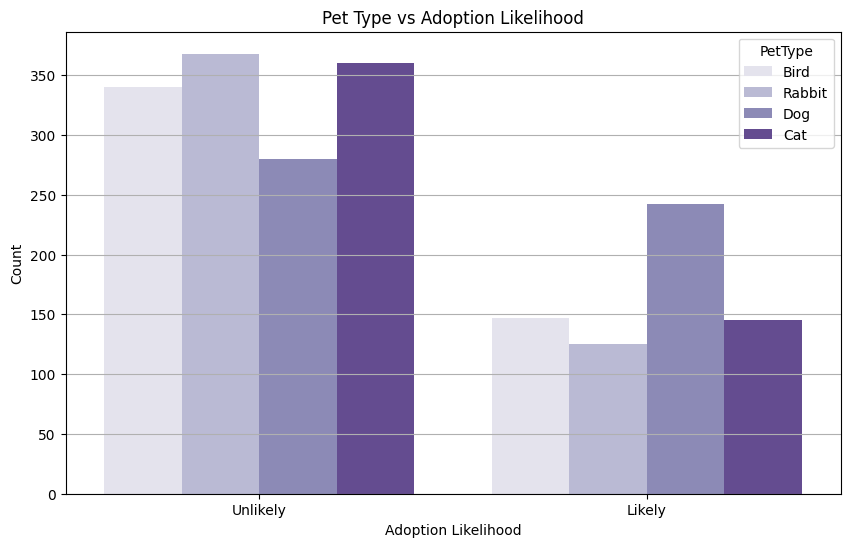

In [18]:
# count plot of pet type vs adoption likelihood
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='AdoptionLikelihood',
    hue='PetType',
    palette='Purples'
)

plt.title('Pet Type vs Adoption Likelihood')
plt.xticks([0, 1], ['Unlikely', 'Likely'])
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

From the plots above it is difficult to tell if the size or type of the pet has an impact on adoption likelihood. Therefore we shall perform **statistical tests**. 

In [19]:
# check for normality using pingouin
df_check = pg.normality(data=df, alpha=0.05)
df_check

,W,pval,normal
AgeMonths,0.951722,3.329216e-25,False
WeightKg,0.955792,3.338498e-24,False
Vaccinated,0.574971,8.332415e-57,False
HealthCondition,0.485692,3.310651e-60,False
TimeInShelterDays,0.953267,7.847404e-25,False
AdoptionFee,0.955278,2.473835e-24,False
PreviousOwner,0.576880,9.995818e-57,False
AdoptionLikelihood,0.592282,4.455643e-56,False
AgeInYears,0.951722,3.329216e-25,False


The data is not normally distributed, the data is independent (one row per pet and no time series data), and both variables are categorical.

As the variables we are testing are categorical, but not binary, we will use the 
Chi-Squared test again.  

#### Hypothesis 3

Null hypothesis: Size has no effect on the likelihood of an animal being adopted

Alternative hypothesis: Size does have an effect on the likelihood of an animal being adopted

In [22]:
# chi-square test of independence
expected, observed, stats = pg.chi2_independence(data=df, x='Size', y='AdoptionLikelihood')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,437.772161,2.0,8.689265e-96,0.467036,1.0
1,cressie-read,0.666667,434.151720,2.0,5.310701e-95,0.465101,1.0
2,log-likelihood,0.000000,435.775892,2.0,2.357585e-95,0.465970,1.0
3,freeman-tukey,-0.500000,444.779684,2.0,2.614079e-97,0.470759,1.0
4,mod-log-likelihood,-1.000000,460.797458,2.0,8.691673e-101,0.479161,1.0
5,neyman,-2.000000,516.747765,2.0,6.160961e-113,0.507418,1.0


In [23]:
# get the p-value from the chi-square pearson test
stats.query("test == 'pearson'")['pval']

0    8.689265e-96
Name: pval, dtype: float64

The significance level, alpha, is set to 0.05.

The p-value from the Pearson test is less than alpha, therefore we reject the null hypothesis.

### Conclusion: the alternate hypothesis is correct: Size does have an effect on the likelihood of adoption. 

#### Hypothesis 4

Null hypothesis: Pet type has no effect on the likelihood of an animal being adopted

Alternative hypothesis: Pet type has an effect on the likelihood of adoption


In [24]:
# chi-square test of independence
expected, observed, stats = pg.chi2_independence(data=df, x='PetType', y='AdoptionLikelihood')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,61.248129,3.0,3.180893e-13,0.174692,1.0
1,cressie-read,0.666667,60.631581,3.0,4.308265e-13,0.173810,1.0
2,log-likelihood,0.000000,59.673273,3.0,6.903137e-13,0.172431,1.0
3,freeman-tukey,-0.500000,59.181970,3.0,8.790104e-13,0.171720,1.0
4,mod-log-likelihood,-1.000000,58.875389,3.0,1.022059e-12,0.171275,1.0
5,neyman,-2.000000,58.789058,3.0,1.066385e-12,0.171149,1.0


In [25]:
# get the p-value from the chi-square pearson test
stats.query("test == 'pearson'")['pval']

0    3.180893e-13
Name: pval, dtype: float64

The significance level, alpha, is set to 0.05.

The p-value from the Pearson test is less than alpha, therefore we reject the null hypothesis.

### Conclusion: the alternate hypothesis is correct: The type of pet does have an effect on the likelihood of adoption. 